# Tensor Flow 2.15 Demo

### Import Libraries

In [16]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

print(tf.__version__)

2.15.0


## Get Files - WGet

In [8]:
!wget https://lazyprogrammer.me/course_files/arrhythmia.data
!ls
!head arrhythmia.data

--2024-01-05 15:21:29--  https://lazyprogrammer.me/course_files/arrhythmia.data
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/octet-stream]
Saving to: ‘arrhythmia.data.2’

arrhythmia.data.2   100%[===================>] 392.92K  2.22MB/s    in 0.2s    

2024-01-05 15:21:30 (2.22 MB/s) - ‘arrhythmia.data.2’ saved [402355/402355]

arrhythmia.data  arrhythmia.data.1  arrhythmia.data.2  sample_data
75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0

### Load Data

Distinguish between the presence and absence of cardiac arrhythmia and classify it in one of the 16 groups.

[Dataset](https://archive.ics.uci.edu/dataset/5/arrhythmia)

    1 Age: Age in years , linear
    2 Sex: Sex (0 = male; 1 = female) , nominal
    3 Height: Height in centimeters , linear
    4 Weight: Weight in kilograms , linear
    5 QRS duration: Average of QRS duration in msec., linear
    6 P-R interval: Average duration between onset of P and Q waves in msec., linear
    7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
    8 T interval: Average duration of T wave in msec., linear
    9 P interval: Average duration of P wave in msec., linear



In [14]:
df = pd.read_csv('arrhythmia.data', header=None)
print(df.head())
print(df.info())
#print(df.columns)

   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB
None


Take some Columns (Features) and Name Them:

In [15]:
data = df[[0, 1, 2, 3, 4, 5]]
data.columns = ['age', 'sex', 'height', 'weight','QRS duration', 'P-R Interval']

### Visualize Data

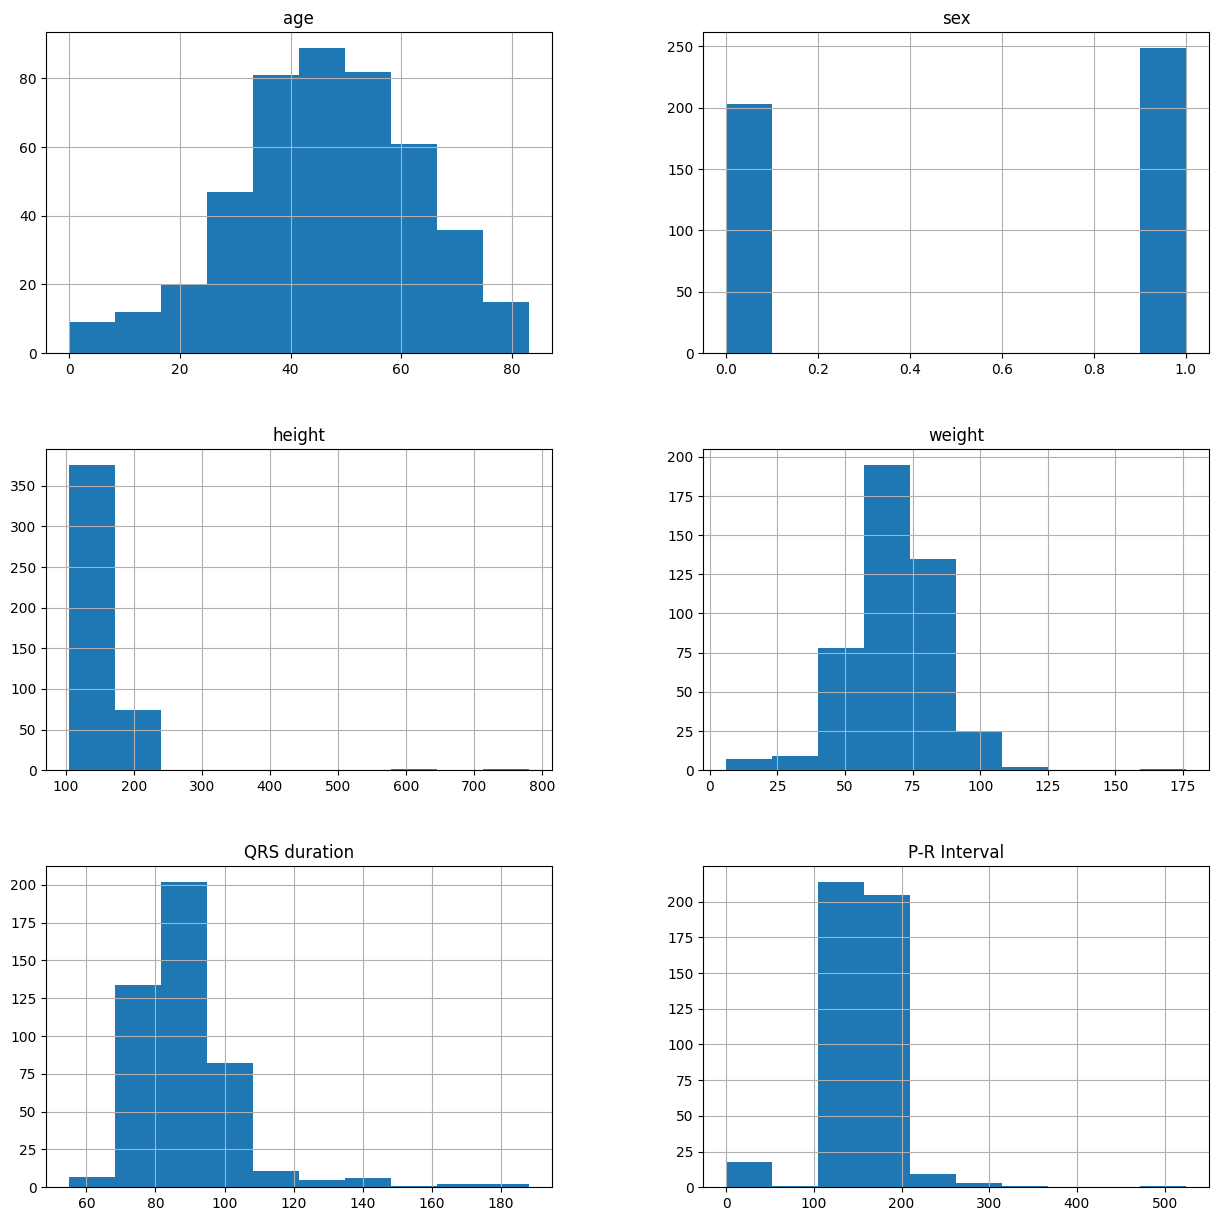

In [20]:
# Histogram
plt.rcParams['figure.figsize'] = [15, 15]
data.hist();  # ";" Supress return value

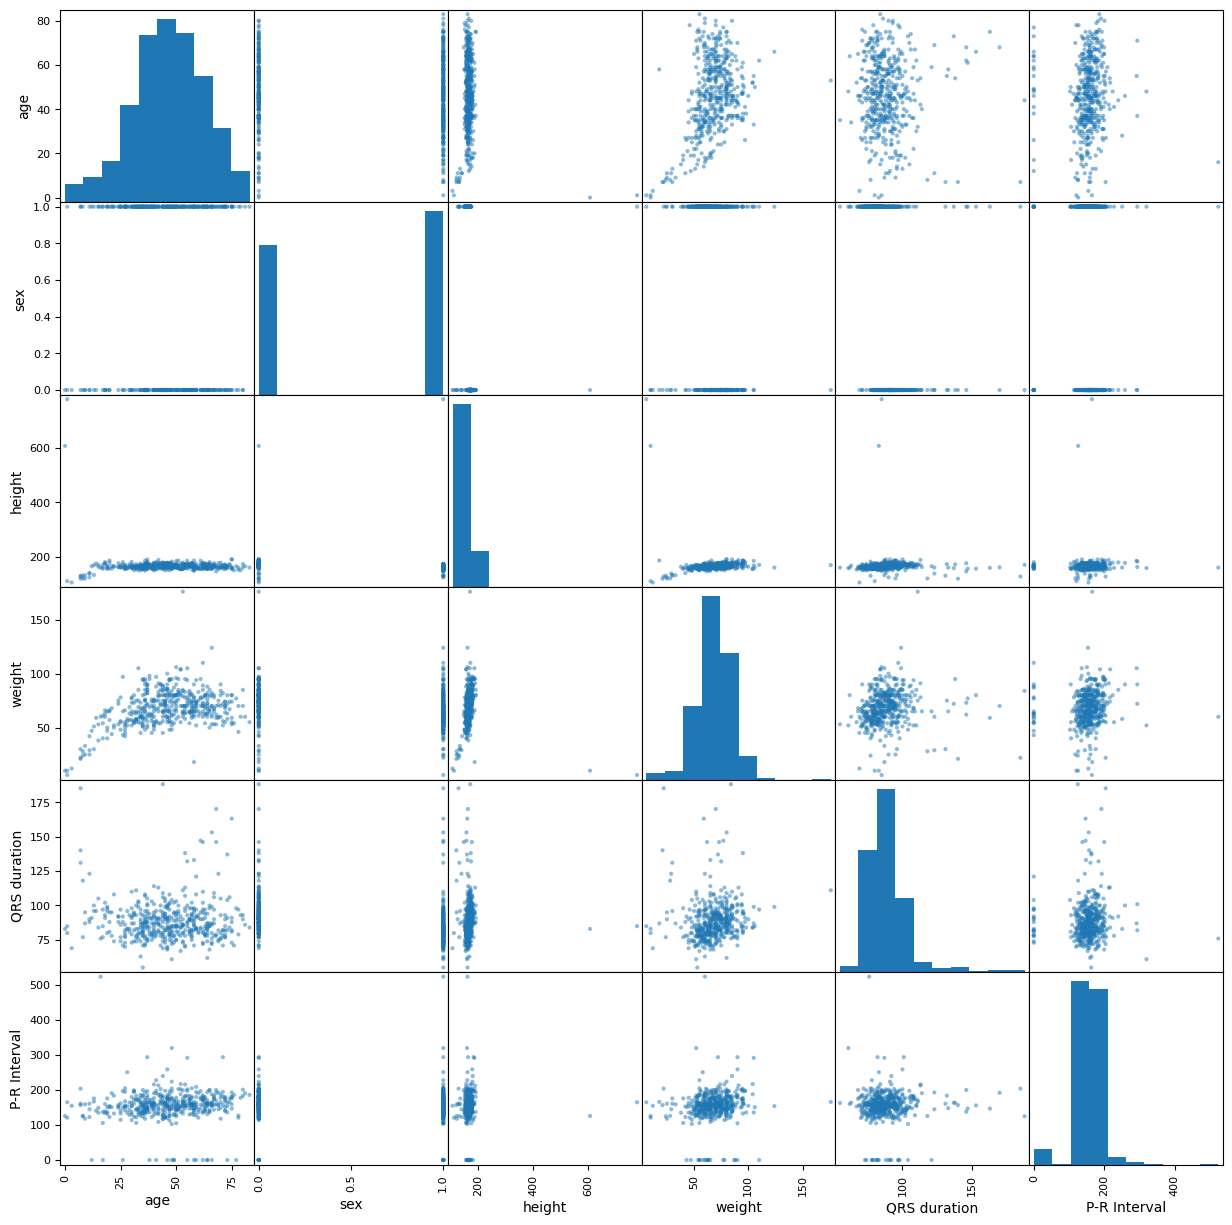

In [19]:
# Scatter Plot and Histogram
scatter_matrix(data);

## Get Files - Keras

In [30]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/auto-mpg.data'

tf.keras.utils.get_file('filename.data', url)

'/root/.keras/datasets/filename.data'

In [31]:
!head /root/.keras/datasets/filename.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


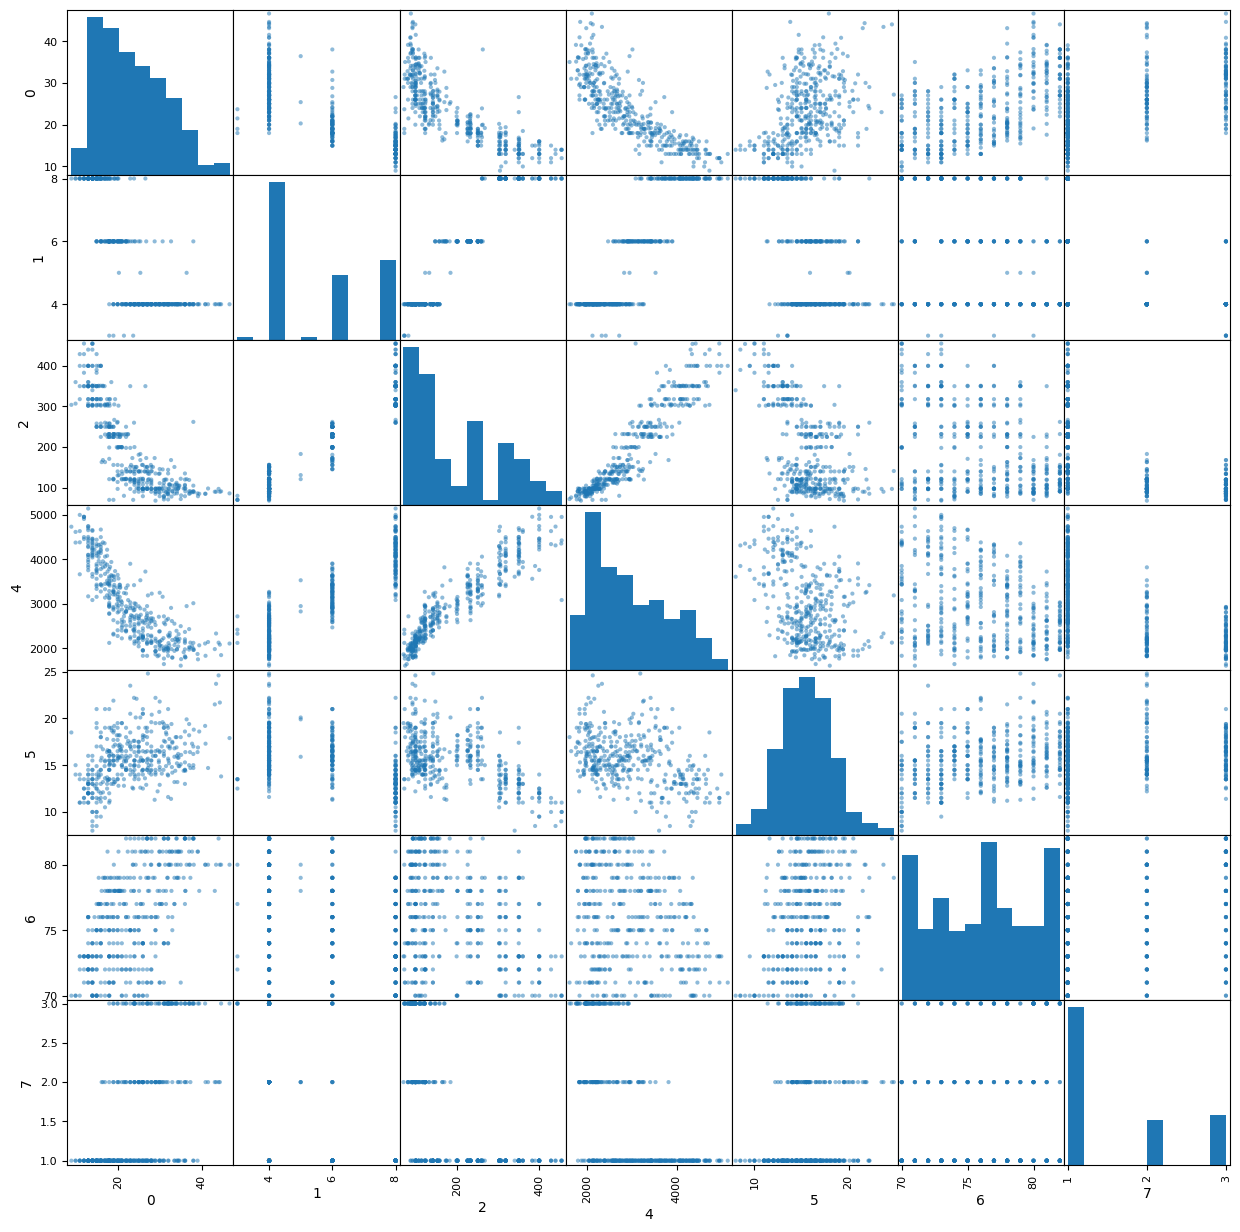

In [32]:
df2 = pd.read_csv('/root/.keras/datasets/filename.data', header=None, delim_whitespace=True)

scatter_matrix(df2);

## Get Files - Colab

In [28]:
from google.colab import files
uploaded = files.upload()

Saving telescope_data.csv to telescope_data.csv


In [33]:
!ls
!head telescope_data.csv

arrhythmia.data  sample_data  telescope_data.csv
,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
2,162.05200000000002,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449000000000002,116.73700000000001,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g
5,51.623999999999995,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.09799999999998,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.573,38.0957,10.5868,4.792,219.08700000000002,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.456,-2.9292,0.812,237.13400000000001,g
8,96.2327,46.5165,4.154,0.0779,0.039,110.355,85.0486,43.1844,4.854,248.226,g


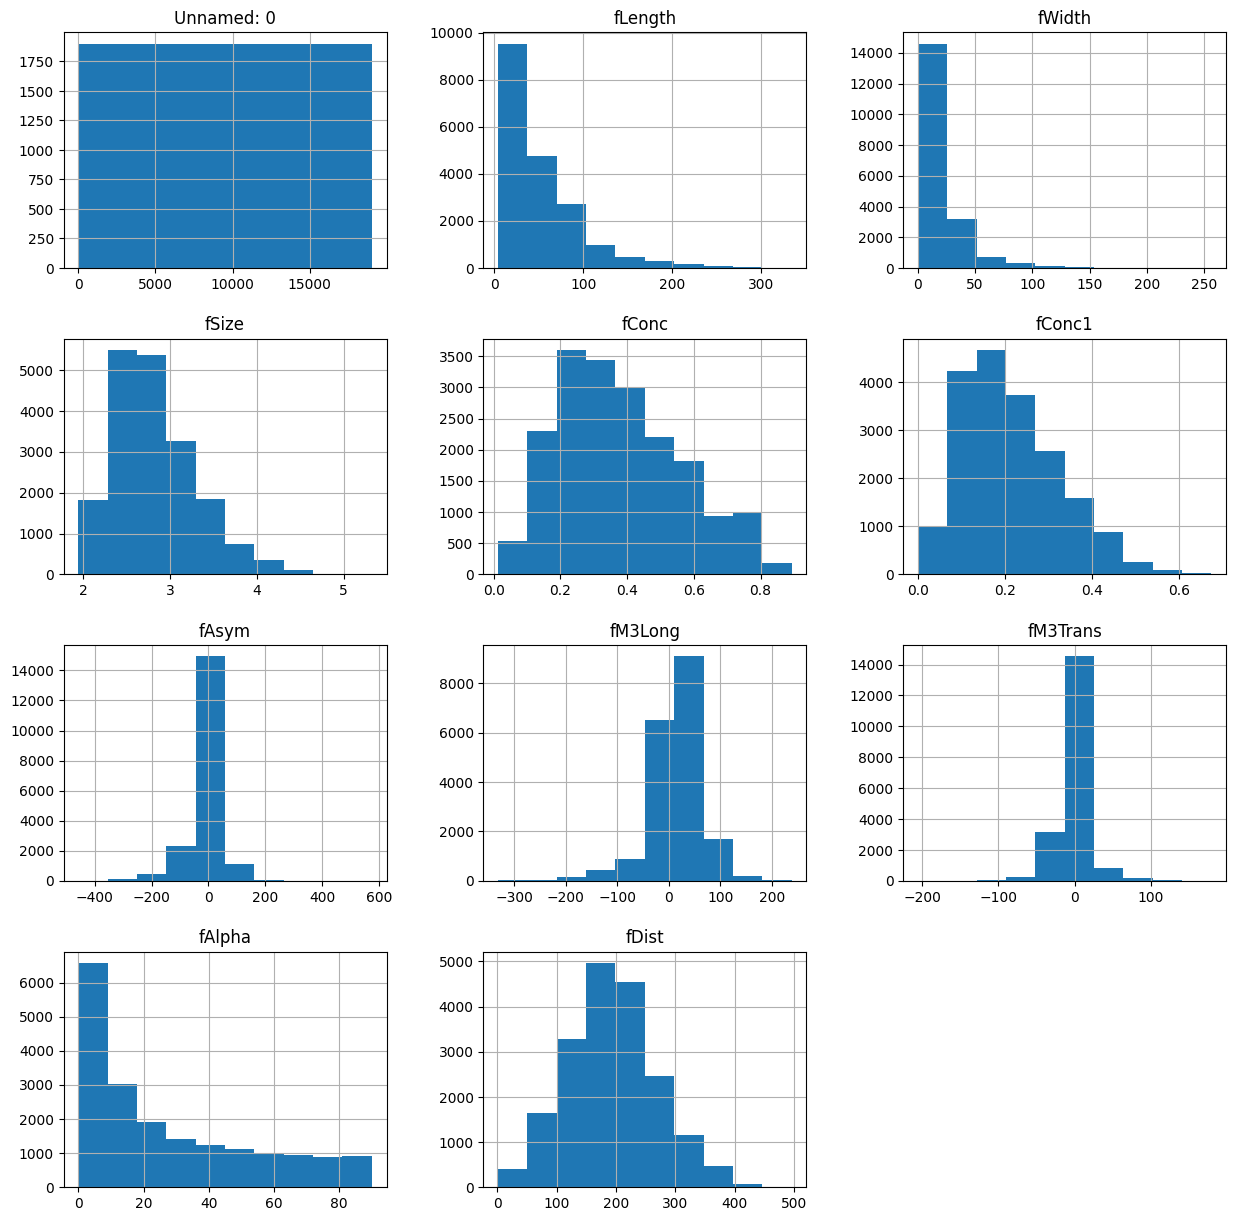

In [38]:
df3 = pd.read_csv('telescope_data.csv')

df3.hist();

## Get Files - Drive

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [44]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'

Old  TF2_Demo.ipynb
